# Analysis on food waste in different countries

## Laura Kay 

### In this project, I will be analyzing data on food waste in different countries. This data was provided by kaggle. The dataset provided contains food waste information, including some  estimates for different sectors. It includes information on household, retail, and food service. Source of data: https://www.kaggle.com/datasets/joebeachcapital/food-waste?resource=download

### Throughout this project, I will be using SQL to query specific information and creating visualizations. Food waste is a major issue worldwide, contributing to social, economic and environmental challenges. Despite efforts from different countriers to mitigate food waste, it still remains a significant problem around the world. The UN Environment Programme states in 2022 there were 1.05 billion tonnes of food waste, that equates to roughly one-fiftth of food available to all consumers. Source: (https://www.unep.org/news-and-stories/press-release/world-squanders-over-1-billion-meals-day-un-report#:~:text=In%202022%20there%20were%201.05,all%20food%20available%20to%20consumers.) 

### Food insecurity is prevalent around the world, studying the sectors from different countries can help impove food security, especially to regions where people are food insecure. 

### I used SQL for querying specific data from this large dataset. Since it allows us to filter, aggregate, and manipulate data to answer some key questions I have on food waste on a global scale. I want to be able to find specific trends and key insights in different countries and regions with this data. 


In [306]:
#import libraries 

import pandas as pd
import sqlite3

In [307]:
#ipython-sql library 

!pip install pandas openpyxl


In [308]:
data = pd.read_csv('./data/Food Waste data and research - by country.csv')

In [309]:
# SQLite connection
conn = sqlite3.connect(':memory:')

# Load DataFrame into SQLite table
data.to_sql('food_waste', conn, index=False, if_exists='replace')

query = 'PRAGMA table_info(food_waste);'
columns_info = pd.read_sql(query, conn)
print(columns_info)

    cid                                 name     type  notnull dflt_value  pk
0     0                              Country     TEXT        0       None   0
1     1    combined figures (kg/capita/year)  INTEGER        0       None   0
2     2  Household estimate (kg/capita/year)  INTEGER        0       None   0
3     3     Household estimate (tonnes/year)  INTEGER        0       None   0
4     4     Retail estimate (kg/capita/year)  INTEGER        0       None   0
..  ...                                  ...      ...      ...        ...  ..
7     7  Food service estimate (tonnes/year)  INTEGER        0       None   0
8     8               Confidence in estimate     TEXT        0       None   0
9     9                             M49 code  INTEGER        0       None   0
10   10                               Region     TEXT        0       None   0
11   11                               Source     TEXT        0       None   0

[12 rows x 6 columns]


In [310]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 10)      
pd.set_option('display.width', 1000)       
pd.set_option('display.max_colwidth', 200) 

query = 'SELECT * FROM food_waste LIMIT 10;'
result = pd.read_sql(query, conn)
display(result)



,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-food-waste-index-report-2151
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-food-waste-index-report-2160
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-food-waste-index-report-2107
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-food-waste-index-report-2161
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-food-waste-index-report-2176
5,Antigua and Barbuda,113,74,7178,13,1244,26,2483,Low Confidence,28,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-food-waste-index-report-2046
6,Argentina,116,72,3243563,16,700380,28,1238100,Very Low Confidence,32,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-food-waste-index-report-2047
7,Armenia,137,93,275195,16,46259,28,81775,Very Low Confidence,51,Western Asia,https://www.unep.org/resources/report/unep-food-waste-index-report-2227
8,Aruba,113,74,7858,13,1362,26,2718,Low Confidence,533,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-food-waste-index-report-2048
9,Australia,133,102,2563110,9,238248,22,546340,High Confidence,36,Australia and New Zealand,https://www.unep.org/resources/report/unep-food-waste-index-report-2021


## Calculating a person's average combined food waste (kg/capita/year) for each region ordering the results in decending order.

In [311]:
query = '''
    SELECT Region, AVG("combined figures (kg/capita/year)") AS avg_combined_figures
    FROM food_waste
    GROUP BY Region
    ORDER BY avg_combined_figures DESC;
'''
result = pd.read_sql(query, conn)
print(result)

                       Region  avg_combined_figures
0          Sub-Saharan Africa                   145
1                Western Asia                   145
2          South-eastern Asia                   137
3             Northern Africa                   134
4                Central Asia                   130
..                        ...                   ...
12               Eastern Asia                   113
13            Northern Europe                   112
14  Australia and New Zealand                   112
15             Eastern Europe                   109
16             Western Europe                   105

[17 rows x 2 columns]


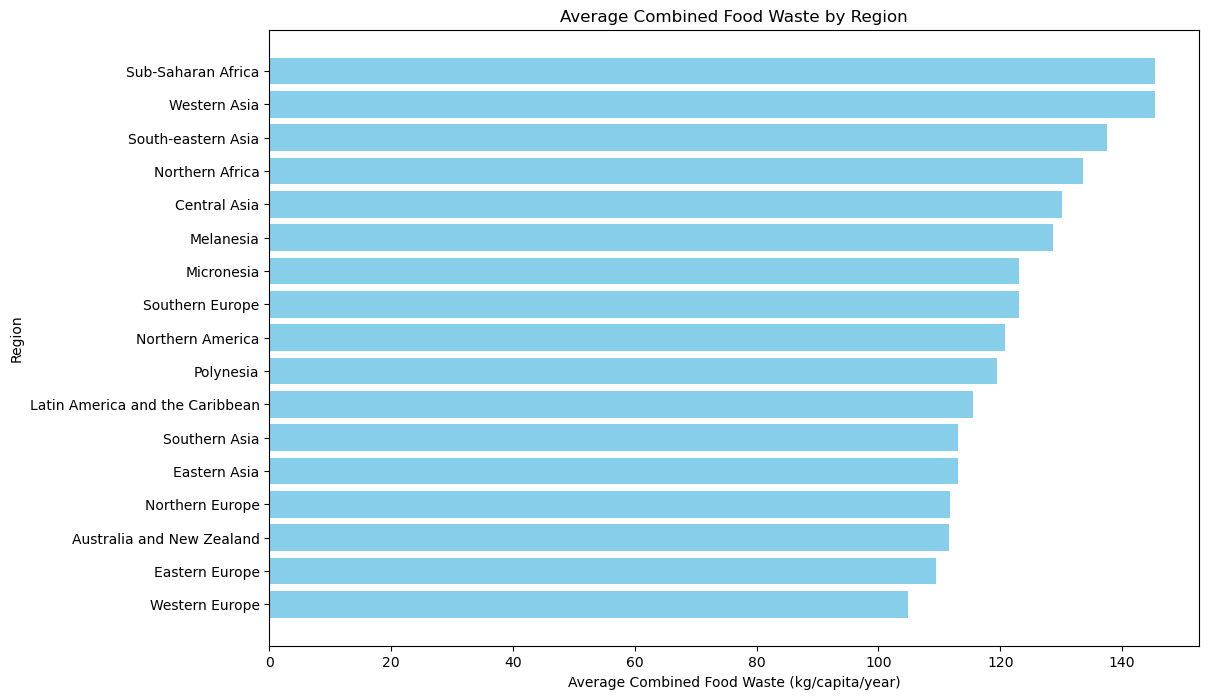

In [312]:
import matplotlib.pyplot as plt

# avg_combined_figures by Region
plt.figure(figsize=(12, 8))
plt.barh(result['Region'], result['avg_combined_figures'], color='skyblue')
plt.xlabel('Average Combined Food Waste (kg/capita/year)')
plt.ylabel('Region')
plt.title('Average Combined Food Waste by Region')
plt.gca().invert_yaxis()  
plt.show()


### The information displays the food waste estimates across region and the combine figures (household, retail, food service) for a person. Sub-Saharan Africa and Western Asia have the highest avg_combined_figures meaning on average, individuals in that region are generating more food waste annually. This can suggest the region may have higher levels of food waste overall. Food waste in the regions with the highest avg_combined_figures could have poor food system management that leads to less efficient distribution, storage, and waste programs. Eastern and Western Europe had the lowest avg_combined_figures, which could be a result of better food systems and waste management practices. 

## Calculating the average household, retail, and food service estimates on food waste (tonnes/year) for reach region. 

In [313]:
query = '''
    SELECT Region, AVG("Household estimate (tonnes/year)") AS avg_household_est,
    AVG("Retail estimate (tonnes/year)") AS avg_retail_est,
    AVG("Food service estimate (tonnes/year)") AS avg_food_service_est
    FROM food_waste
    GROUP BY Region
    ORDER BY avg_household_est DESC
'''
result = pd.read_sql(query, conn)
pd.options.display.float_format = '{:,.0f}'.format

print(result)



                Region  avg_household_est  avg_retail_est  avg_food_service_est
0         Eastern Asia         15,194,469       3,533,088             9,937,663
1        Southern Asia         12,031,653       3,333,474             5,452,375
2     Northern America          5,576,764       1,408,031             5,473,622
3   South-eastern Asia          4,849,073       1,123,170             1,842,598
4      Northern Africa          3,685,824         628,733             1,111,445
..                 ...                ...             ...                   ...
12     Southern Europe            798,010          91,818               248,900
13     Northern Europe            669,110          69,632               168,524
14           Melanesia            195,333          33,994                60,258
15           Polynesia             11,423           2,119                 3,950
16          Micronesia              6,492           1,112                 2,071

[17 rows x 4 columns]


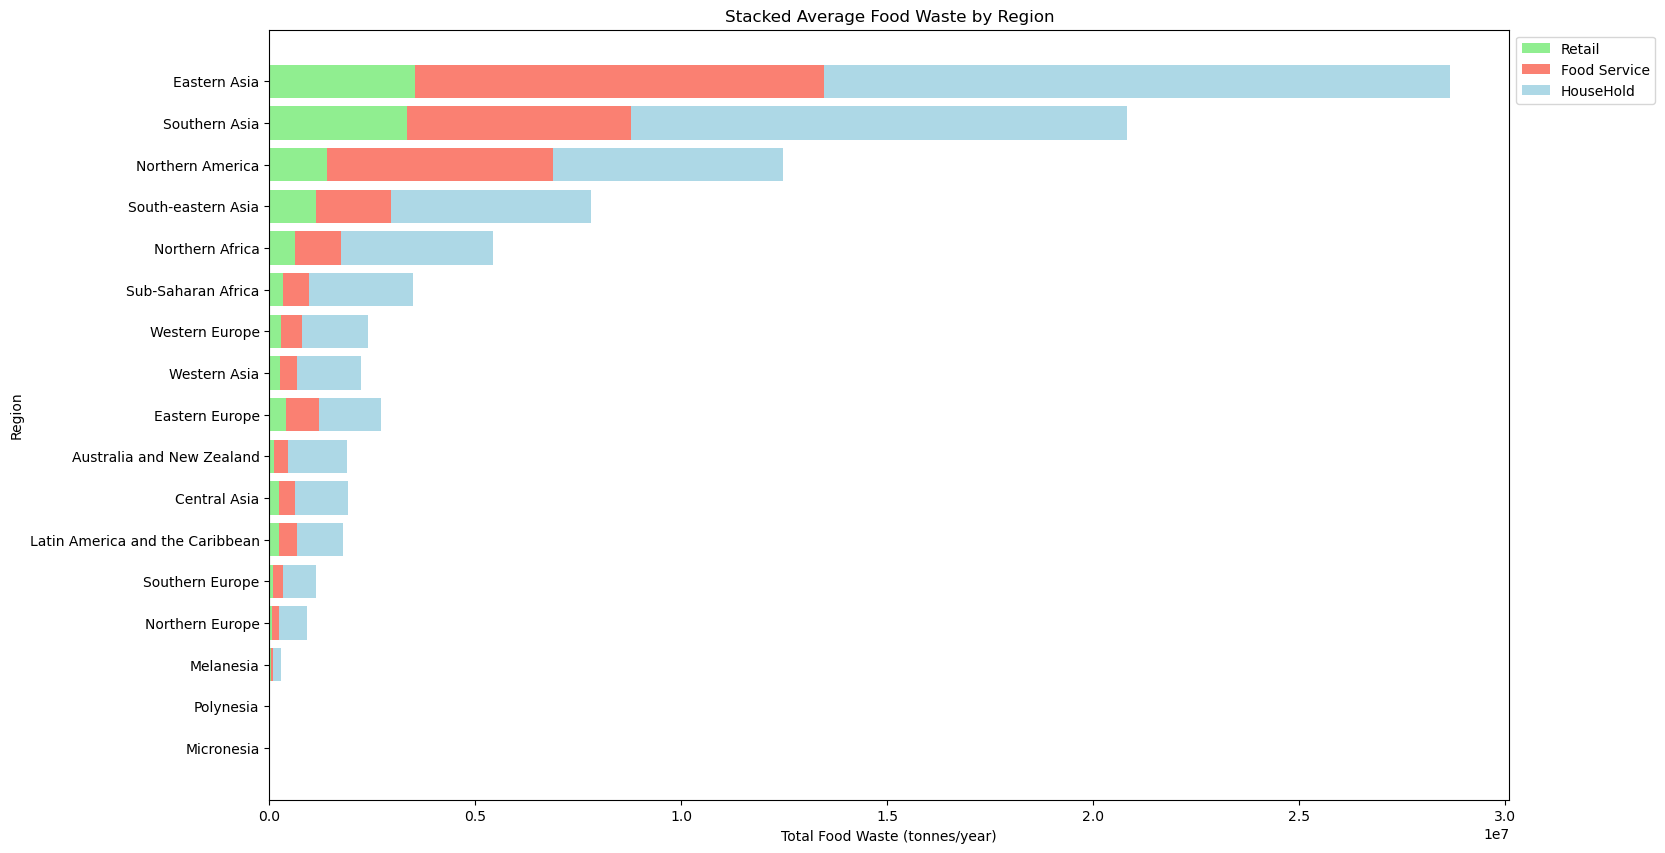

In [314]:
plt.figure(figsize=(16, 10))
plt.barh(result['Region'], result['avg_retail_est'], label='Retail', color='lightgreen')
plt.barh(result['Region'], result['avg_food_service_est'], label='Food Service', left=result['avg_retail_est'], color='salmon')
plt.barh(result['Region'], result['avg_household_est'], label='HouseHold', left=result['avg_retail_est'] + result['avg_food_service_est'], color='lightblue')


plt.xlabel('Total Food Waste (tonnes/year)')
plt.ylabel('Region')
plt.title('Stacked Average Food Waste by Region')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  

plt.gca().invert_yaxis()
plt.show()


In [315]:
# Some statistics for each category
desc_stats = result[['avg_household_est', 'avg_retail_est', 'avg_food_service_est']].describe()
print(desc_stats)


       avg_household_est  avg_retail_est  avg_food_service_est
count                 17              17                    17
mean           3,177,934         713,184             1,635,426
std            4,270,710       1,094,446             2,734,073
min                6,492           1,112                 2,071
25%              798,010          91,818               248,900
50%            1,515,513         259,932               424,306
75%            3,685,824         628,733             1,111,445
max           15,194,469       3,533,088             9,937,663


### The information displays results about each region's average household, retail, and food service (tonnes/year). With Eastern Asia having the highest household estimate, retail estimate, and food service estimate. This suggest that significant amounts of food waste is occuring within each sector of this region. Most regions are showing a higher household estimate on food waste compared to both retail and food service estimates, meaning household food waste is the larger issue. Some regions like Northern America have average household estimate and food service estimate relatively the close in value. In addition, regions such has Melanesia, Polynesia, Micronesia, have the lowest in each sector possibly due to smaller populations in those regions and lifestyle. 

## Analyzing the top two regions with the highest total household estimates on food waste by country

In [316]:
query = '''
    SELECT Country, SUM("Household estimate (tonnes/year)") as Total_Household
    FROM food_waste
    WHERE Region IN ("Eastern Asia", "Southern Asia")
    GROUP BY Country
    ORDER BY Total_Household DESC
'''
result = pd.read_sql(query, conn)
print(result)


                 Country  Total_Household
0                  China         91646213
1                  India         68760163
2               Pakistan         15947645
3             Bangladesh         10618233
4                  Japan          8159891
..                   ...              ...
11  China, Hong Kong SAR           530985
12              Mongolia           250173
13                Bhutan            60000
14      China, Macao SAR            45728
15              Maldives            37688

[16 rows x 2 columns]


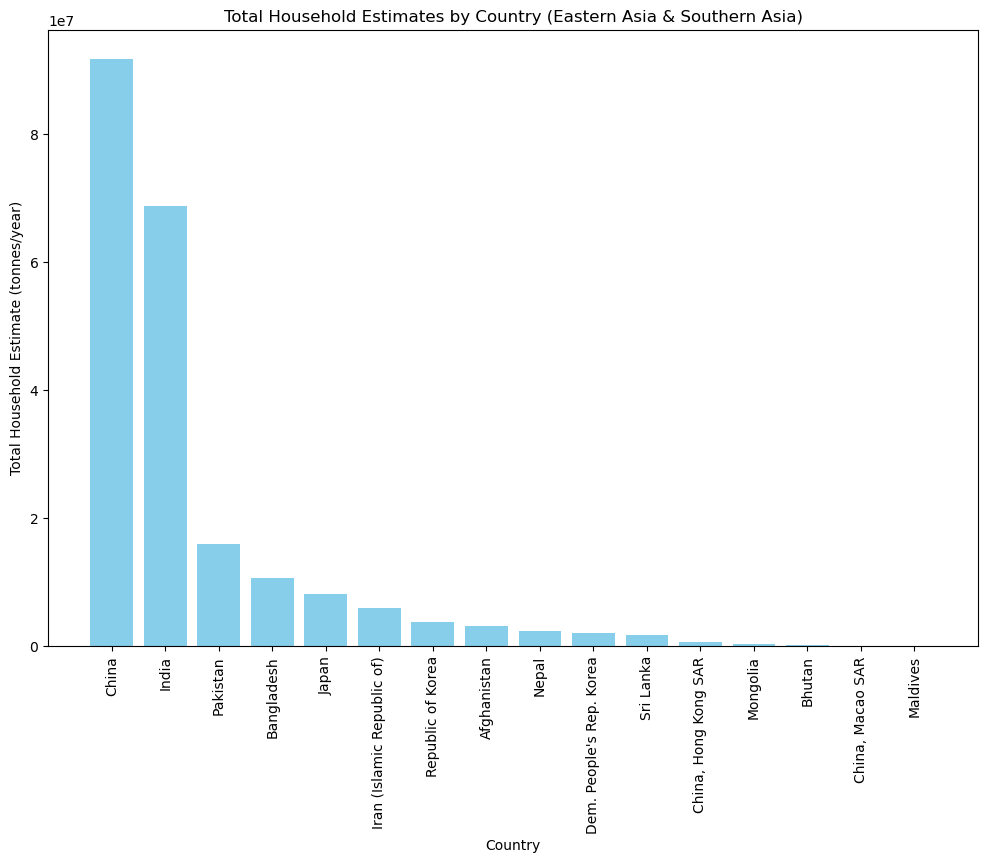

In [317]:
plt.figure(figsize=(12, 8))

plt.bar(result['Country'], result['Total_Household'], color='skyblue')

plt.xlabel('Country')
plt.ylabel('Total Household Estimate (tonnes/year)')
plt.title('Total Household Estimates by Country (Eastern Asia & Southern Asia)')

plt.xticks(rotation=90)

plt.show()



### Taking a closer look at the two regions by analyzing the countries in those regions and the total household estimate on food waste. China and India account for a significant portion of the total household food waste. This could be a indiciation of their large population, comsumption patterns, or possible needs to reform food waste management in their countries. Addressing food waste within these two countries could drive major impact on reducing global food waste. 

## Analyzing household waste for countries with varying confidence estimates 

In [318]:
query = '''
    SELECT Country, "household estimate (tonnes/year)", "Confidence in estimate" 
    FROM food_waste 
    WHERE "Confidence in estimate" = "High Confidence"
    
'''
result = pd.read_sql(query, conn)
print(result)


                    Country  Household estimate (tonnes/year) Confidence in estimate
0                 Australia                           2563110        High Confidence
1                   Austria                            349249        High Confidence
2                   Denmark                            469449        High Confidence
3                   Germany                           6263775        High Confidence
4                     Italy                           4059806        High Confidence
5               New Zealand                            291769        High Confidence
6              Saudi Arabia                           3594080        High Confidence
7                    Sweden                            812948        High Confidence
8            United Kingdom                           5199825        High Confidence
9  United States of America                          19359951        High Confidence


In [319]:
query = '''
    SELECT Country, "household estimate (tonnes/year)", "Confidence in estimate" 
    FROM food_waste 
    WHERE "Confidence in estimate" IN ("Low Confidence", "Very Low Confidence", "Medium Confidence", "High Confidence")
     
'''
result = pd.read_sql(query, conn)
print(result)



                        Country  Household estimate (tonnes/year) Confidence in estimate
0                   Afghanistan                           3109153    Very Low Confidence
1                       Albania                            238492    Very Low Confidence
2                       Algeria                           3918529    Very Low Confidence
3                       Andorra                              6497         Low Confidence
4                        Angola                           3169523    Very Low Confidence
..                          ...                               ...                    ...
209  Venezuela (Boliv. Rep. of)                           2065461    Very Low Confidence
210                    Viet Nam                           7346717    Very Low Confidence
211                       Yemen                           3026946    Very Low Confidence
212                      Zambia                           1391729    Very Low Confidence
213                  

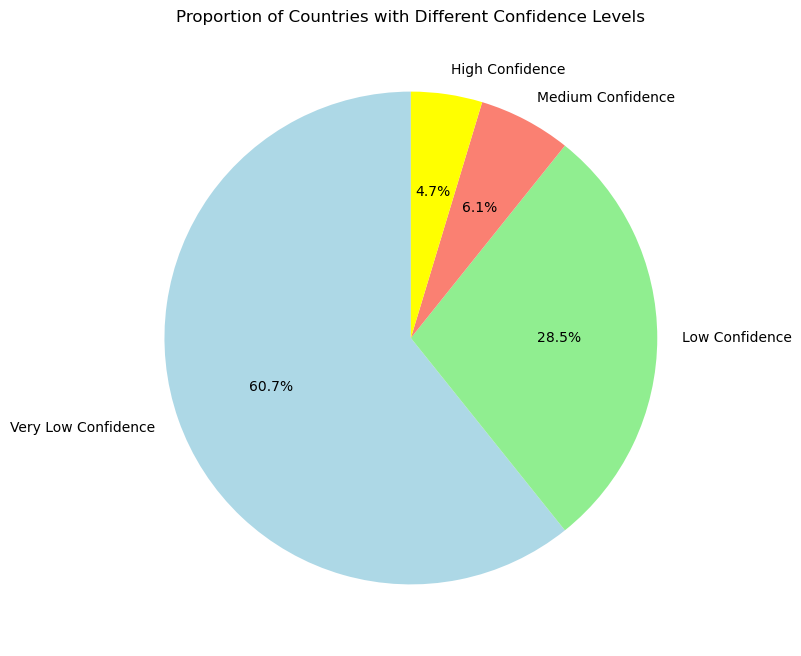

In [320]:
confidence_counts = result['Confidence in estimate'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(confidence_counts, labels=confidence_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon', 'yellow'])

plt.title('Proportion of Countries with Different Confidence Levels')
plt.show()


### When analyzing household food waste per year, understanding the confidence estimate is crucial for interpreting the reliability of the information. Countries with "high confidence" in their food waste data typically have efficient data collection systems and advanced approaches, which ensures accuracy and reliability in their estimates. These are often well-developed nations with established reporting structure. Only 9 countries have "high confidence". On the other hand, we can see the majority of the confidence is either "Very Low Confidence" or "Low Confidence". These estimates are less reliable and often based on limited or indirect data. This could mean significant uncertainty in the food waste data for these nations and may suggest their food waste figures may not be as accurate. 

## Conclusion

### In conclusion, the sector that contributes to the highest number of food waste is within households throughout every country. To effectively reduce food waste, it is crucial to raise awareness and educate households. Informing people to be more mindful about how much food waste contributes to the environement, economy, and to themselves. It is also about ensuring everyone has proper means to store and preserve food, which is vital in ensuring perishable food last as long as possible. Education on meal planning can help households by preventing overpurchasing of food and reduce waste. Countries and regions with high populations can work on programs that allocate food to those in need. These programs could encourage households and businesses to donate surplus foods to government funded programs. Programs like food banks, community kitchens, and donation centers can be a way to address hunger to those in need and decrease food waste. With intervention, food waste levels can be significantly reduced, promoting more sustainable consumption practices. 